# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('sinasc_RO_2019.csv')

In [8]:
df.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

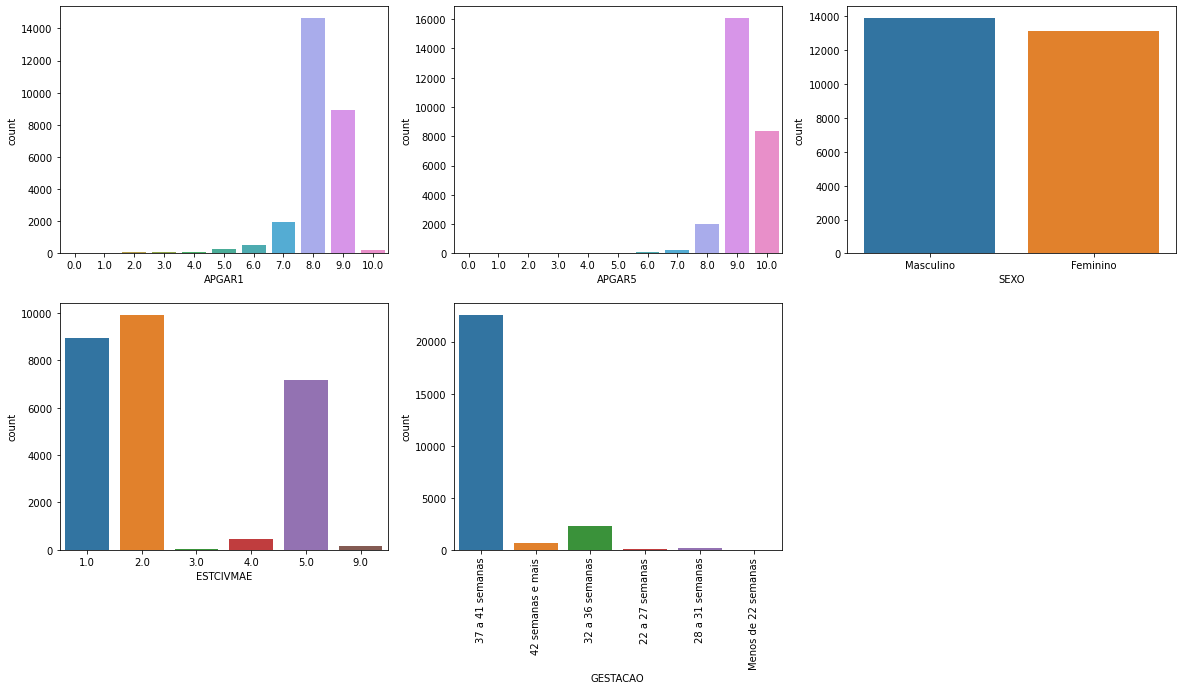

In [35]:
plt.rc('figure', figsize=(20, 10))

fig, axes = plt.subplots(2, 3)
fig.delaxes(ax = axes[1,2]) 
sns.countplot(ax = axes[0, 0], x='APGAR1', data=df)
sns.countplot(ax = axes[0, 1], x='APGAR5', data=df)
sns.countplot(ax = axes[0, 2], x='SEXO', data=df)
sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data=df)
sns.countplot(ax = axes[1, 1], x='GESTACAO', data=df)
rotation = plt.xticks(rotation=90)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [10]:
apgar5_mean = df['APGAR5'].groupby(df['CONSULTAS']).mean()
apgar5_mean

CONSULTAS
1    8.981481
2    9.057395
3    9.154440
4    9.207188
9    8.860000
Name: APGAR5, dtype: float64

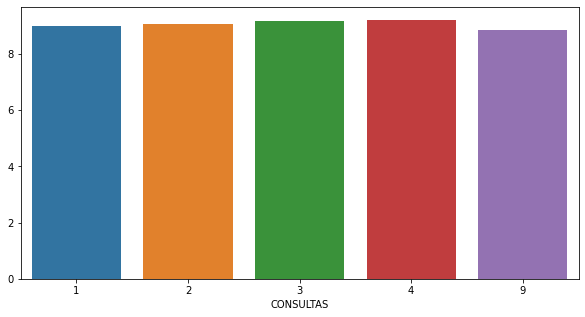

In [11]:
plt.rc('figure', figsize=(10, 5))
sns.barplot(x=apgar5_mean.index, y=apgar5_mean.values)

Fazendo o gráfico sem definir uma escala para o eixo y deixa todas as variáveis muito próximas. Utilizando o comando `g.set_yscale("log") `, deixamos os valores na escala multiplicados por 10 na potência 0 (que é 1). Basicamente, deixa os valores mais fáceis de notarmos uma diferença em cada variável.

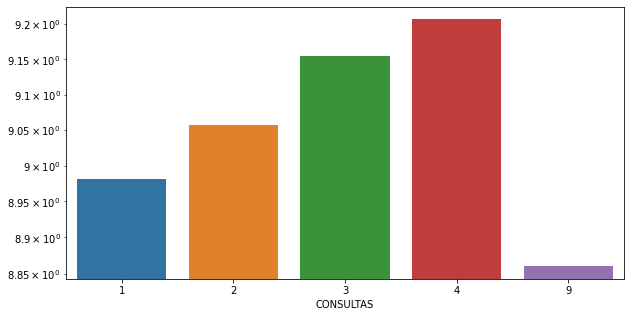

In [12]:
plt.rc('figure', figsize=(10, 5))
g = sns.barplot(x=apgar5_mean.index, y=apgar5_mean.values)
g.set_yscale("log")

Lembrando que o valor 9 na variável `CONSULTAS` representa um valor não informado.

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

In [247]:
def make_catplot(column: str, rotation):
    new_df = df[column].value_counts(normalize=True)
    new_df = new_df.mul(100).reset_index(name='Porcentagem').rename(columns={'index': column})

    g = sns.catplot(x= column, y='Porcentagem', kind='bar', data=new_df)
    g.ax.set_ylim(0,100)
    g.set_xticklabels(rotation=rotation)
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() + 0.2
        txt_y = p.get_height() + 1
        g.ax.text(txt_x,txt_y,txt)

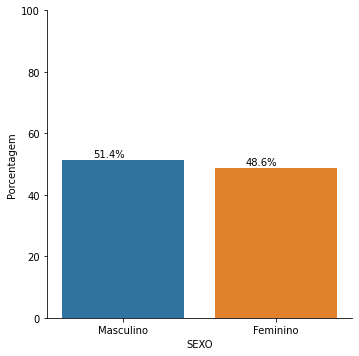

In [251]:
make_catplot('SEXO', None)

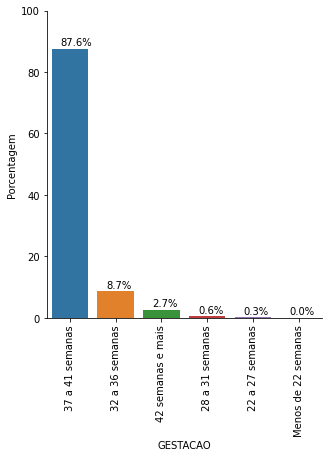

In [253]:
make_catplot('GESTACAO', 90)

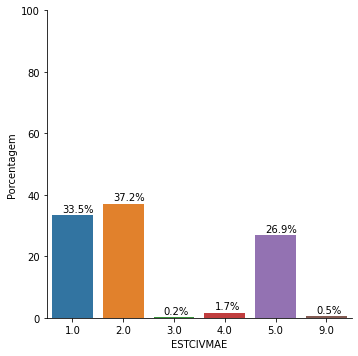

In [254]:
make_catplot('ESTCIVMAE', None)

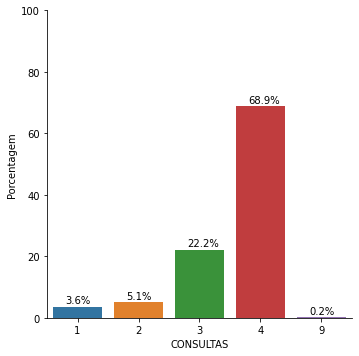

In [256]:
make_catplot('CONSULTAS', None)